# Import libraries

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from itertools import combinations
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

# Read data

In [2]:
mimic_selected_vitals_anomalies_path = os.getcwd() + "/" + ".." + "/" + ".." + "/" + "data" + "/" + "mimic_selected_vitals_anomalies.csv"
mimic_selected_vitals_anomalies_df = pd.read_csv(mimic_selected_vitals_anomalies_path)

In [3]:
mimic_selected_vitals_anomalies_df.head()

,stay_id,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,gcsmotor,y_knn_agg,y_lof,y_inflo,y_kdeos,y_ldf,ensemble_scores
0,30000153,106.840000,136.088235,67.794118,87.060606,14.166667,37.500000,96.640000,3.312500,3.187500,5.812500,834.169786,1.013877,0.950746,0.202975,0.659624,2.604505
1,30000213,81.680000,134.920000,56.160000,79.120000,19.595745,37.006944,98.960000,3.714286,3.571429,5.714286,730.278657,1.023900,1.011859,0.555881,0.532086,2.517474
2,30000484,89.958333,105.750000,55.625000,65.083333,14.708333,35.912698,99.791667,3.600000,1.000000,3.000000,865.164648,1.268335,1.173592,0.989104,0.659310,4.272058
3,30000646,86.423729,92.703704,56.481481,64.666667,25.627119,37.375000,95.610169,4.000000,5.000000,6.000000,694.001705,1.017573,0.902358,0.298412,0.596037,2.495786
4,30001148,75.520000,107.900000,58.400000,72.533333,13.875000,36.388889,98.360000,3.166667,3.666667,5.166667,458.248935,1.009164,0.898699,0.032911,0.547903,2.020581


# Attributes vs ensemble score - scatter plots

In [4]:
attributes = ['heartrate', 'sysbp', 'diabp', 'meanbp', 'resprate', 'tempc', 'spo2', 'gcseye', 'gcsverbal', 'gcsmotor']

In [5]:
attributes_combinations = list(combinations(attributes, 2))

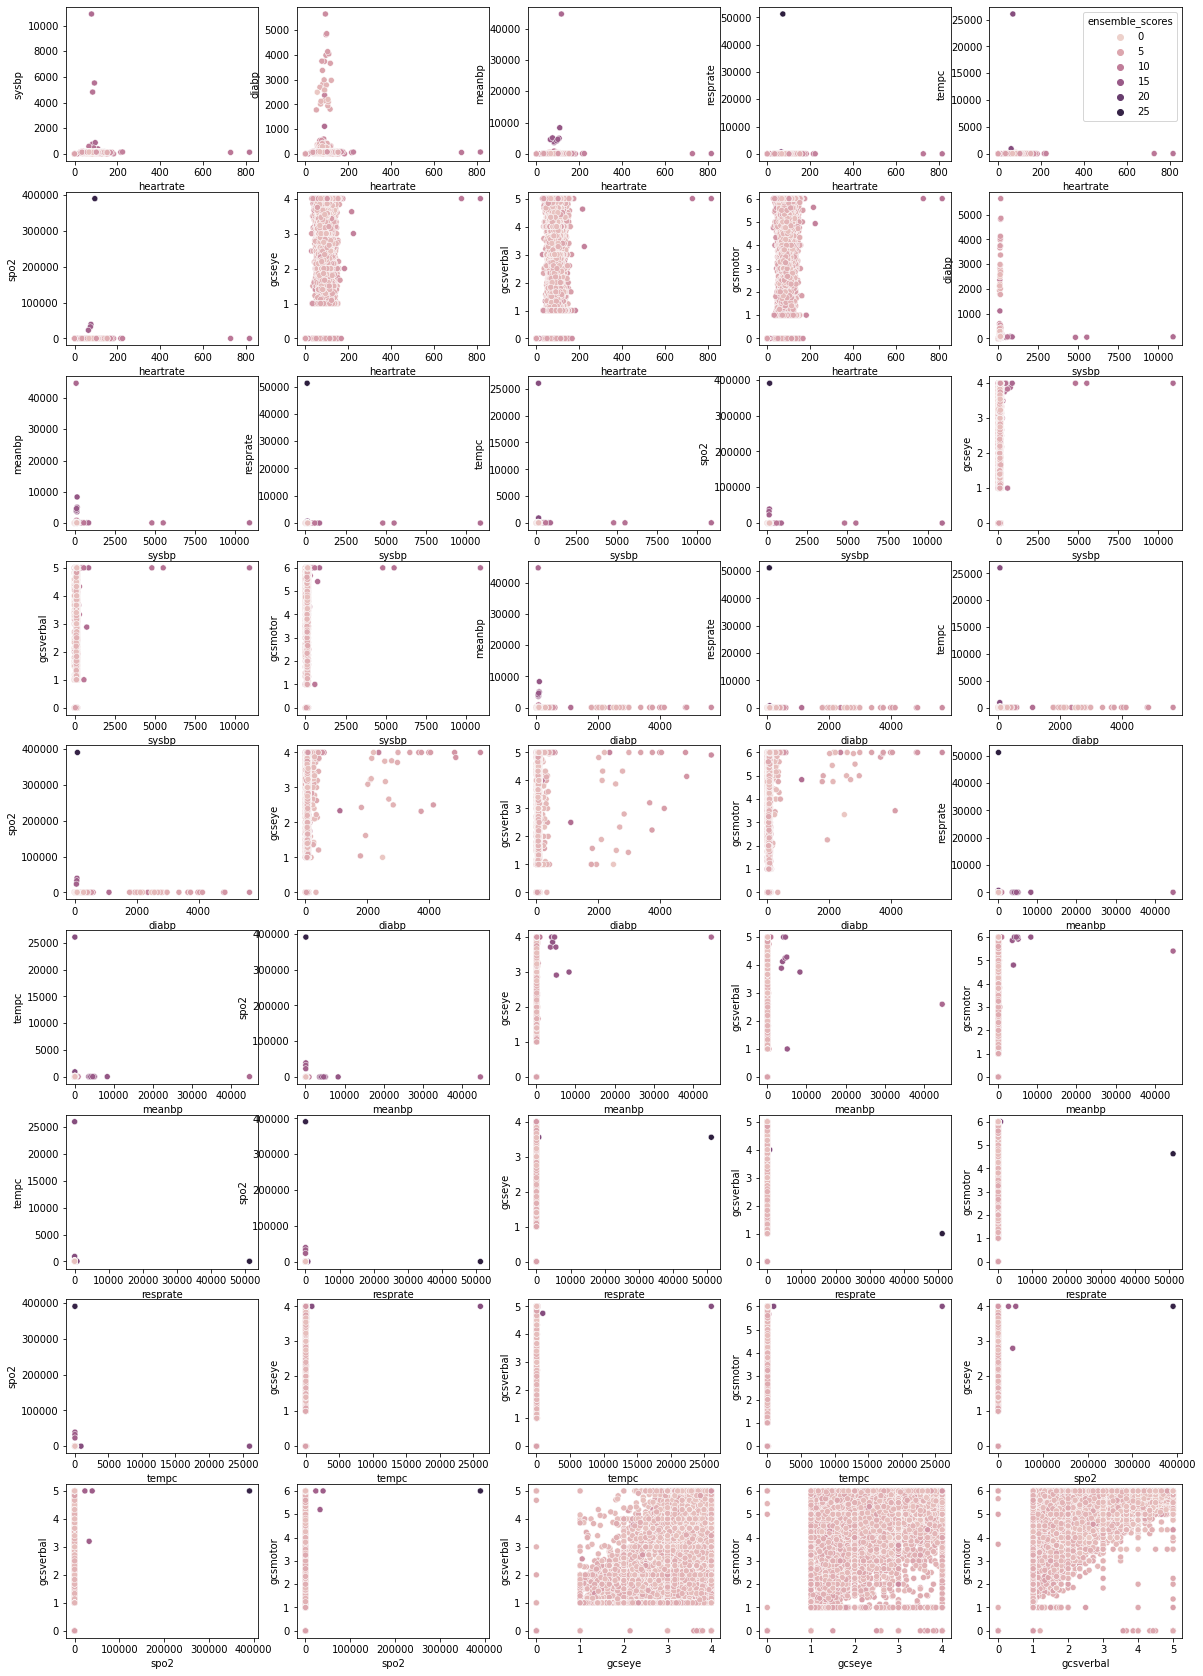

In [6]:
fig, axs = plt.subplots(9,5, figsize=(20, 30))

for i, ax in enumerate(axs.flatten()):
    legend = True if i == 4 else False
    sns.scatterplot(
        data = mimic_selected_vitals_anomalies_df,
        x = attributes_combinations[i][0], 
        y = attributes_combinations[i][1], 
        hue = "ensemble_scores",
        legend = legend,
        ax=ax
    )
    ax.set_xlabel(attributes_combinations[i][0])
    ax.set_ylabel(attributes_combinations[i][1])

plt.show()

# PCA - without scaling

In [7]:
pca = PCA(n_components=2)
pca.fit(mimic_selected_vitals_anomalies_df[attributes])

PCA(n_components=2)

In [8]:
pca.explained_variance_ratio_

array([0.96281829, 0.01622444])

In [9]:
pca.singular_values_

array([394584.47890307,  51221.55060623])

In [10]:
pca.n_features_in_

10

In [11]:
pca.feature_names_in_

array(['heartrate', 'sysbp', 'diabp', 'meanbp', 'resprate', 'tempc',
       'spo2', 'gcseye', 'gcsverbal', 'gcsmotor'], dtype=object)

In [12]:
mimic_selected_vitals_anomalies_pca = pca.transform(mimic_selected_vitals_anomalies_df[attributes])

In [13]:
mimic_selected_vitals_anomalies_pca1 = [row[0] for row in mimic_selected_vitals_anomalies_pca]

In [14]:
mimic_selected_vitals_anomalies_pca2 = [row[1] for row in mimic_selected_vitals_anomalies_pca]

In [15]:
mimic_selected_vitals_anomalies_df['pca1'] = mimic_selected_vitals_anomalies_pca1

In [16]:
mimic_selected_vitals_anomalies_df['pca2'] = mimic_selected_vitals_anomalies_pca2

In [17]:
mimic_selected_vitals_anomalies_df.head()

,stay_id,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,gcsmotor,y_knn_agg,y_lof,y_inflo,y_kdeos,y_ldf,ensemble_scores,pca1,pca2
0,30000153,106.840000,136.088235,67.794118,87.060606,14.166667,37.500000,96.640000,3.312500,3.187500,5.812500,834.169786,1.013877,0.950746,0.202975,0.659624,2.604505,-6.417332,-5.087343
1,30000213,81.680000,134.920000,56.160000,79.120000,19.595745,37.006944,98.960000,3.714286,3.571429,5.714286,730.278657,1.023900,1.011859,0.555881,0.532086,2.517474,-4.099193,0.329863
2,30000484,89.958333,105.750000,55.625000,65.083333,14.708333,35.912698,99.791667,3.600000,1.000000,3.000000,865.164648,1.268335,1.173592,0.989104,0.659310,4.272058,-3.270696,-4.545035
3,30000646,86.423729,92.703704,56.481481,64.666667,25.627119,37.375000,95.610169,4.000000,5.000000,6.000000,694.001705,1.017573,0.902358,0.298412,0.596037,2.495786,-7.453159,6.376775
4,30001148,75.520000,107.900000,58.400000,72.533333,13.875000,36.388889,98.360000,3.166667,3.666667,5.166667,458.248935,1.009164,0.898699,0.032911,0.547903,2.020581,-4.701684,-5.384159


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

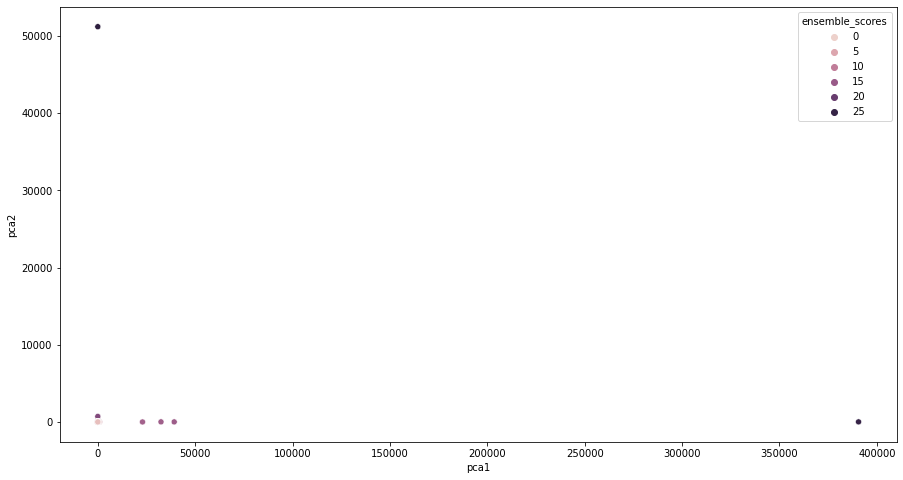

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data = mimic_selected_vitals_anomalies_df,
    x = 'pca1', 
    y = 'pca2', 
    hue = "ensemble_scores",
)

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

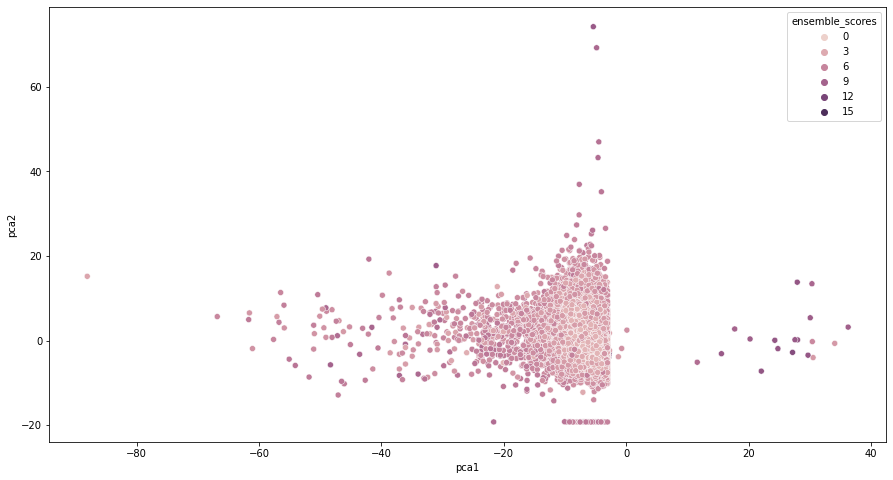

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data = mimic_selected_vitals_anomalies_df[
        (mimic_selected_vitals_anomalies_df.pca2 < 100) & 
        (mimic_selected_vitals_anomalies_df.pca1 < 100) &
        (mimic_selected_vitals_anomalies_df.pca1 > -100)
    ],
    x = 'pca1', 
    y = 'pca2', 
    hue = "ensemble_scores",
)

# PCA - with scaling

In [20]:
for attribute in attributes:
    mimic_selected_vitals_anomalies_df[attribute + '_norm'] = (mimic_selected_vitals_anomalies_df[attribute] - mimic_selected_vitals_anomalies_df[attribute].mean())/mimic_selected_vitals_anomalies_df[attribute].std()

In [21]:
n_pca = PCA(n_components=2)
n_pca.fit(mimic_selected_vitals_anomalies_df[[attribute + '_norm' for attribute in attributes]])

PCA(n_components=2)

In [22]:
n_pca.explained_variance_ratio_

array([0.25956929, 0.10569148])

In [23]:
n_pca.singular_values_

array([445.4581151 , 284.24983581])

In [24]:
n_pca.n_features_in_

10

In [25]:
n_pca.feature_names_in_

array(['heartrate_norm', 'sysbp_norm', 'diabp_norm', 'meanbp_norm',
       'resprate_norm', 'tempc_norm', 'spo2_norm', 'gcseye_norm',
       'gcsverbal_norm', 'gcsmotor_norm'], dtype=object)

In [26]:
mimic_selected_vitals_anomalies_n_pca = n_pca.transform(mimic_selected_vitals_anomalies_df[[attribute + '_norm' for attribute in attributes]])

In [27]:
mimic_selected_vitals_anomalies_n_pca1 = [row[0] for row in mimic_selected_vitals_anomalies_n_pca]

In [28]:
mimic_selected_vitals_anomalies_n_pca2 = [row[1] for row in mimic_selected_vitals_anomalies_n_pca]

In [29]:
mimic_selected_vitals_anomalies_df['n_pca1'] = mimic_selected_vitals_anomalies_n_pca1

In [30]:
mimic_selected_vitals_anomalies_df['n_pca2'] = mimic_selected_vitals_anomalies_n_pca2

In [31]:
mimic_selected_vitals_anomalies_df.head()

,stay_id,heartrate,sysbp,diabp,meanbp,resprate,tempc,spo2,gcseye,gcsverbal,...,diabp_norm,meanbp_norm,resprate_norm,tempc_norm,spo2_norm,gcseye_norm,gcsverbal_norm,gcsmotor_norm,n_pca1,n_pca2
0,30000153,106.840000,136.088235,67.794118,87.060606,14.166667,37.500000,96.640000,3.312500,3.187500,...,0.049445,0.043558,-0.027480,0.015999,-0.004498,-0.052476,-0.325269,0.379704,-0.032955,0.792131
1,30000213,81.680000,134.920000,56.160000,79.120000,19.595745,37.006944,98.960000,3.714286,3.571429,...,-0.140981,-0.003175,0.001826,0.010774,-0.002873,0.401021,-0.082658,0.299819,0.386438,-0.074345
2,30000484,89.958333,105.750000,55.625000,65.083333,14.708333,35.912698,99.791667,3.600000,1.000000,...,-0.149737,-0.085785,-0.024556,-0.000824,-0.002290,0.272026,-1.707583,-1.907912,-1.922462,-0.025240
3,30000646,86.423729,92.703704,56.481481,64.666667,25.627119,37.375000,95.610169,4.000000,5.000000,...,-0.135719,-0.088237,0.034383,0.014674,-0.005220,0.723508,0.820078,0.532212,1.152906,-0.321052
4,30001148,75.520000,107.900000,58.400000,72.533333,13.875000,36.388889,98.360000,3.166667,3.666667,...,-0.104317,-0.041939,-0.029055,0.004223,-0.003293,-0.217079,-0.022476,-0.145600,-0.214959,-0.422858


<AxesSubplot:xlabel='n_pca1', ylabel='n_pca2'>

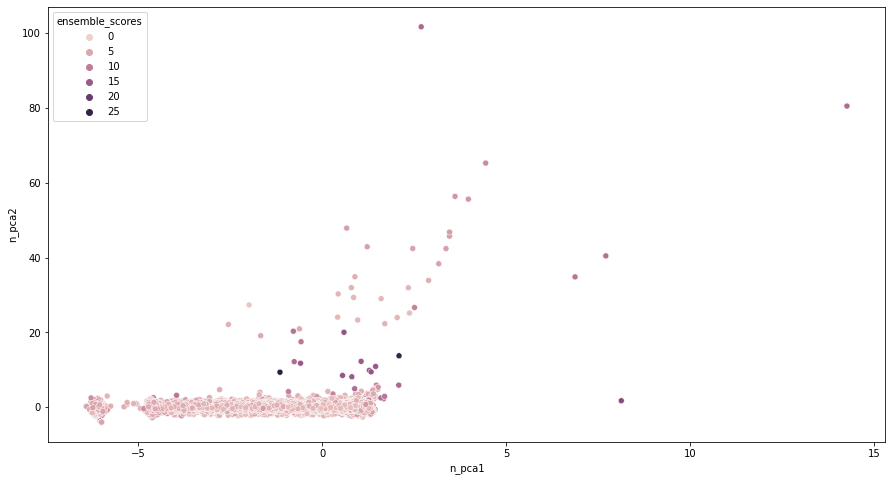

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data = mimic_selected_vitals_anomalies_df,
    x = 'n_pca1', 
    y = 'n_pca2', 
    hue = "ensemble_scores",
)

<AxesSubplot:xlabel='n_pca1', ylabel='n_pca2'>

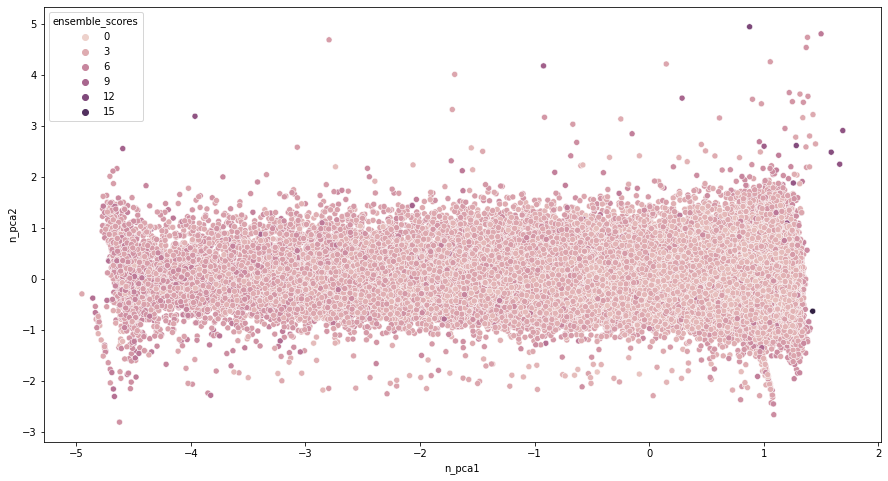

In [33]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data = mimic_selected_vitals_anomalies_df[
        (mimic_selected_vitals_anomalies_df.n_pca2 < 5) & 
        (mimic_selected_vitals_anomalies_df.n_pca1 < 5) &
        (mimic_selected_vitals_anomalies_df.n_pca1 > -5)
    ],
    x = 'n_pca1', 
    y = 'n_pca2', 
    hue = 'ensemble_scores',
)

# Missing values

In [51]:
mimic_selected_vitals_anomalies_df['is_missing'] = [False] * mimic_selected_vitals_anomalies_df.shape[0]

In [66]:
for attribute in attributes:
    mimic_selected_vitals_anomalies_df['is_missing'] = (mimic_selected_vitals_anomalies_df['is_missing']) | (mimic_selected_vitals_anomalies_df[attribute] == 0)

In [71]:
mimic_selected_vitals_anomalies_df.groupby('is_missing')['ensemble_scores'].mean()

is_missing
False    2.856694
True     3.542721
Name: ensemble_scores, dtype: float64

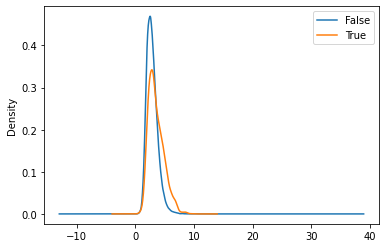

In [98]:
fig, ax = plt.subplots()

for key, grp in mimic_selected_vitals_anomalies_df.groupby('is_missing')['ensemble_scores']:
    ax = grp.plot(ax=ax, kind='density', x='ensemble_scores', label=key)

plt.legend(loc='best')
plt.show()

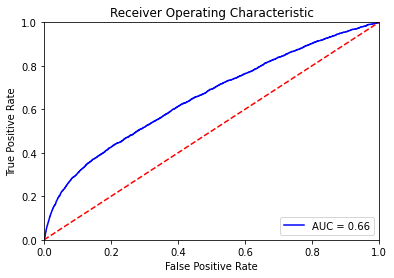

In [101]:
fpr, tpr, threshold = metrics.roc_curve(
    mimic_selected_vitals_anomalies_df['is_missing'],
    mimic_selected_vitals_anomalies_df['ensemble_scores'], 
)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

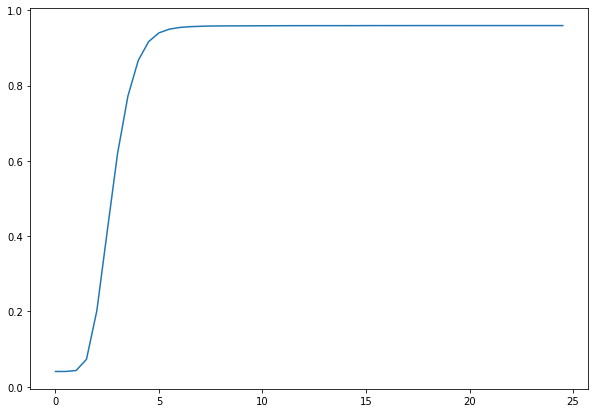

In [123]:
x = []
y = []
for i in np.arange(0, 25, 0.5):
    x.append(i)
    y.append(metrics.accuracy_score(
        mimic_selected_vitals_anomalies_df['is_missing'], 
        (mimic_selected_vitals_anomalies_df['ensemble_scores'] > i)
    ))

plt.figure(figsize=(10,7))
plt.plot(x, y)

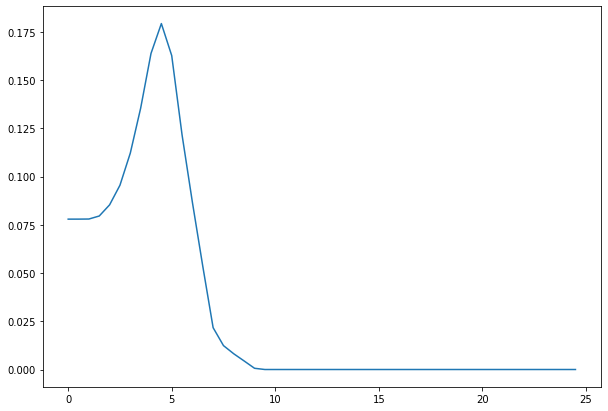

In [126]:
x = []
y = []
for i in np.arange(0, 25, 0.5):
    x.append(i)
    y.append(metrics.f1_score(
        mimic_selected_vitals_anomalies_df['is_missing'], 
        (mimic_selected_vitals_anomalies_df['ensemble_scores'] > i)
    ))

plt.figure(figsize=(10,7))
plt.plot(x, y)

In [144]:
sum(mimic_selected_vitals_anomalies_df[mimic_selected_vitals_anomalies_df['ensemble_scores'] > 4.5]['is_missing'])/sum(mimic_selected_vitals_anomalies_df['is_missing'])

0.22426589222329785

# Outliers

In [72]:
mimic_selected_vitals_anomalies_df['is_outlier'] = [False] * mimic_selected_vitals_anomalies_df.shape[0]

In [90]:
for attribute in attributes:
    q1 = mimic_selected_vitals_anomalies_df[attribute].quantile(0.25)
    q3 = mimic_selected_vitals_anomalies_df[attribute].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    mimic_selected_vitals_anomalies_df['is_outlier'] = (mimic_selected_vitals_anomalies_df['is_outlier']) | (mimic_selected_vitals_anomalies_df[attribute] < fence_low) | (mimic_selected_vitals_anomalies_df[attribute] > fence_high)

In [92]:
mimic_selected_vitals_anomalies_df.groupby('is_outlier')['ensemble_scores'].mean()

is_outlier
False    2.651012
True     3.687356
Name: ensemble_scores, dtype: float64

In [91]:
sum(mimic_selected_vitals_anomalies_df['is_outlier'])

17224

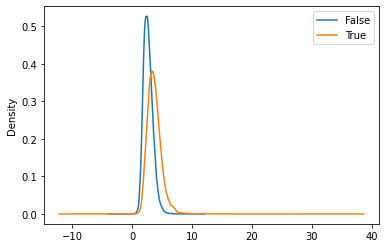

In [99]:
fig, ax = plt.subplots()

for key, grp in mimic_selected_vitals_anomalies_df.groupby('is_outlier')['ensemble_scores']:
    ax = grp.plot(ax=ax, kind='density', x='ensemble_scores', label=key)

plt.legend(loc='best')
plt.show()

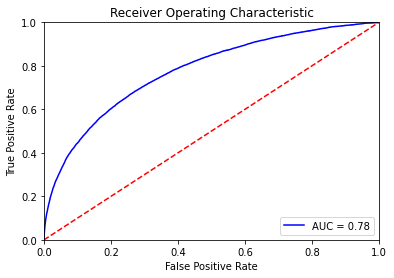

In [102]:
fpr, tpr, threshold = metrics.roc_curve(
    mimic_selected_vitals_anomalies_df['is_outlier'],
    mimic_selected_vitals_anomalies_df['ensemble_scores'], 
)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

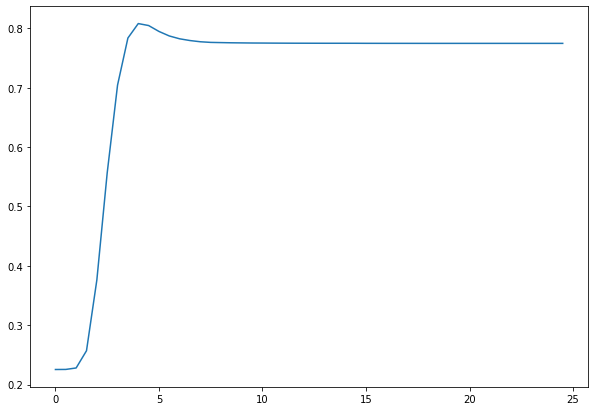

In [124]:
x = []
y = []
for i in np.arange(0, 25, 0.5):
    x.append(i)
    y.append(metrics.accuracy_score(
        mimic_selected_vitals_anomalies_df['is_outlier'], 
        (mimic_selected_vitals_anomalies_df['ensemble_scores'] > i)
    ))

plt.figure(figsize=(10,7))
plt.plot(x, y)

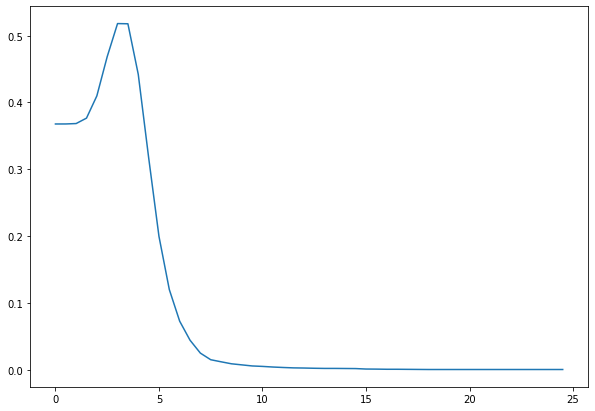

In [128]:
x = []
y = []
for i in np.arange(0, 25, 0.5):
    x.append(i)
    y.append(metrics.f1_score(
        mimic_selected_vitals_anomalies_df['is_outlier'], 
        (mimic_selected_vitals_anomalies_df['ensemble_scores'] > i)
    ))

plt.figure(figsize=(10,7))
plt.plot(x, y)

In [163]:
sum(mimic_selected_vitals_anomalies_df[mimic_selected_vitals_anomalies_df['ensemble_scores'] > 4.5]['is_outlier'])/sum(mimic_selected_vitals_anomalies_df['is_outlier'])

0.20186948444031583

In [162]:
sum(mimic_selected_vitals_anomalies_df[mimic_selected_vitals_anomalies_df['ensemble_scores'] > 4.5]['is_outlier'])

3477

In [157]:
sum(mimic_selected_vitals_anomalies_df['ensemble_scores'] > 4.5)

4655

<AxesSubplot:>

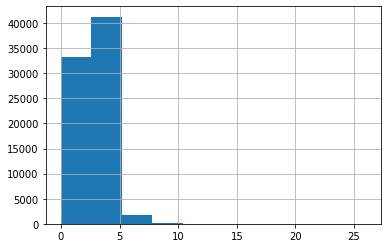

In [167]:
mimic_selected_vitals_anomalies_df['ensemble_scores'].hist()